In [1]:
import nurbs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
poles_x = 5
poles_y = 4
poles_z = 3
degree_x = 4
degree_y = 3
degree_z = 2
knots_x = nurbs.create_knots_vector(-1, 1, degree_x, poles_x)
knots_y = nurbs.create_knots_vector(-1, 1, degree_y, poles_y)
knots_z = nurbs.create_knots_vector(-1, 1, degree_z, poles_z)
weights = np.array([1] * (poles_x * poles_y * poles_z))

In [3]:
nu = nurbs.NurbsBase3D(knots_x, knots_y, knots_z, weights, degree_x, degree_y, degree_z)
nu.computeFirstDerivatives()

In [4]:
xi = np.linspace(-1, 1, 30)
yi = np.linspace(-1, 1, 30)
zi = np.linspace(-1, 1, 30)
test = np.array([xi, yi, zi]).T
mat = nu.getInfluenceMatrix(test)

In [10]:
x = np.linspace(-1, 1, poles_x)
y = np.linspace(-1., 1., poles_y)
z = np.linspace(-1., 1., poles_z)
poles = np.array([[[[xi, yi, zi] for zi in z] for yi in y] for xi in x]).reshape(-1, 3)
u = poles.T[0]**4 + poles.T[1]**3 +poles.T[2]**2

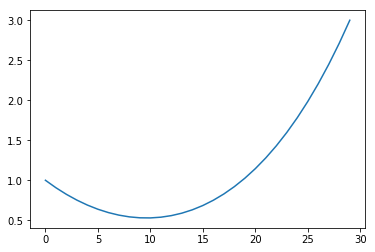

In [11]:
plt.plot(mat@u)
plt.show()

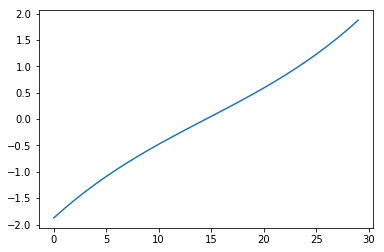

In [12]:
du = nu.getDuMatrix(test)
plt.plot(du @ u)
plt.show()

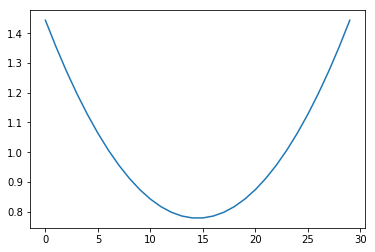

In [13]:
dv = nu.getDvMatrix(test)
plt.plot(dv @ u)
plt.show()

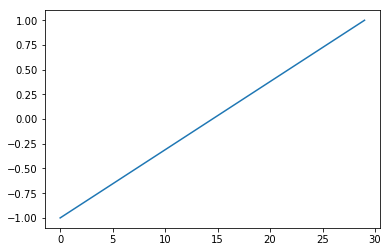

In [14]:
dw = nu.getDwMatrix(test)
plt.plot(dw @ u)
plt.show()